## <font size=5> <strong>Heart Disease Prediction by Batch-13
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'Ad-2-13 batch Documentation.pdf', 'app.py', 'augmented_heart.csv', 'batch-13.ppt', 'bhavanippt.jpg', 'chanduppt.jpg', 'code.txt', 'columns_in_table_of_heart_disease_project.txt', 'CSE(AIML)_Project_PPT2 - Copy.ppt', 'CSE(AIML)_Project_PPT2.ppt', 'doccopy.txt', 'documentProject.docx', 'harippt.jpg', 'heart.csv', 'heartcopy.csv', 'heart_disease_gui.py', 'Heart_disease_prediction.ipynb', 'heart_disease_prediction_copy.py', 'Heart_disease_prediction_running - Copy.ipynb', 'Heart_disease_prediction_running.ipynb', 'merged-ppt1and2.ppt', 'newdataset.py', 'output', 'random_forest_model.pkl', 'second-review-ppt-pictures', 'second-review-ppt.ppt']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("augmented_heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(606, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
471,60,1,0,131,256,0,0,147,0,4.4,1,1,3,0
596,69,1,2,150,209,0,0,151,0,2.8,1,0,3,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
508,52,1,0,128,252,0,1,164,1,2.0,2,1,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,54.379538,0.683168,0.966997,131.618812,246.178218,0.148515,0.528053,149.674917,0.326733,1.057756,1.399340,0.729373,2.313531,0.544554
std,9.171525,0.465626,1.031199,17.453738,51.781658,0.355903,0.525425,22.897290,0.469406,1.838603,0.615717,1.021761,0.611770,0.498422
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.900000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,80.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,8.600000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.4 KB


In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    606.000000
mean       0.544554
std        0.498422
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
thalach     0.418748
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
oldpeak     0.250097
age         0.219931
trestbps    0.152611
restecg     0.137230
chol        0.086446
fbs         0.028046
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    330
0    276
Name: count, dtype: int64


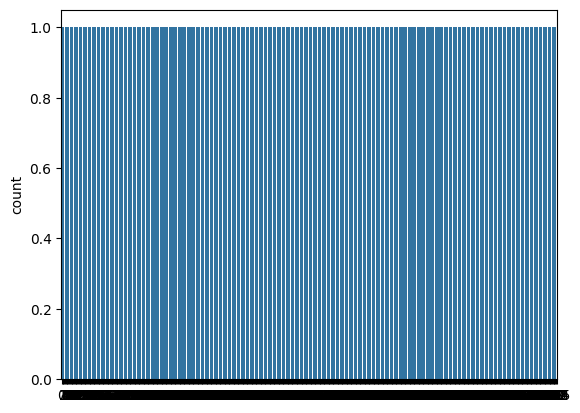

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 91.09
Percentage of patience with heart problems: 108.91


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

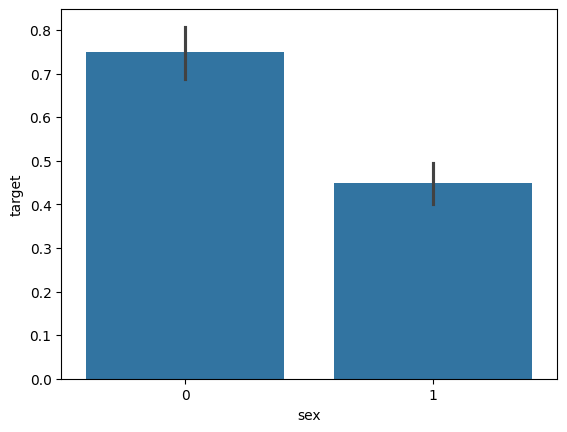

In [18]:
sns.barplot(x=dataset["sex"],y=y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

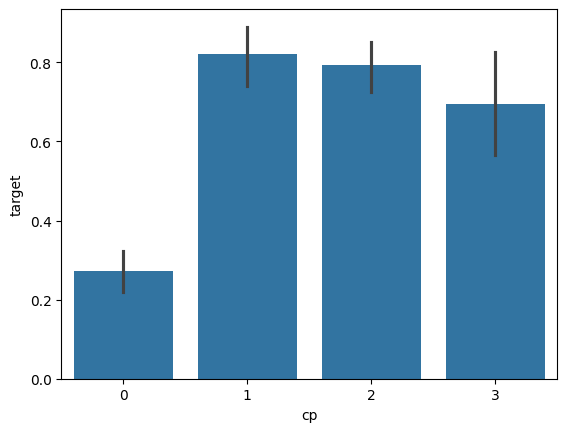

In [20]:
sns.barplot(x=dataset["cp"],y=y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    606.000000
mean       0.148515
std        0.355903
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

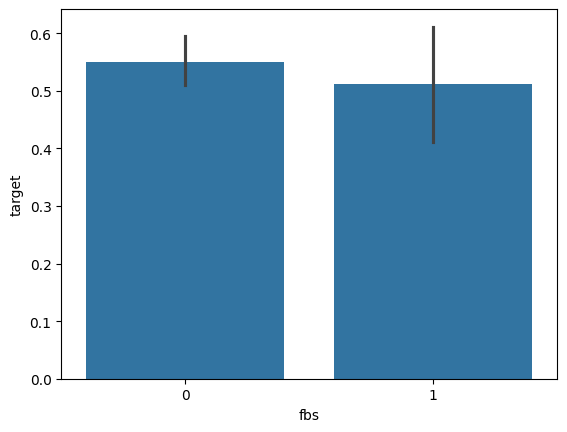

In [23]:
sns.barplot(x=dataset["fbs"],y=y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

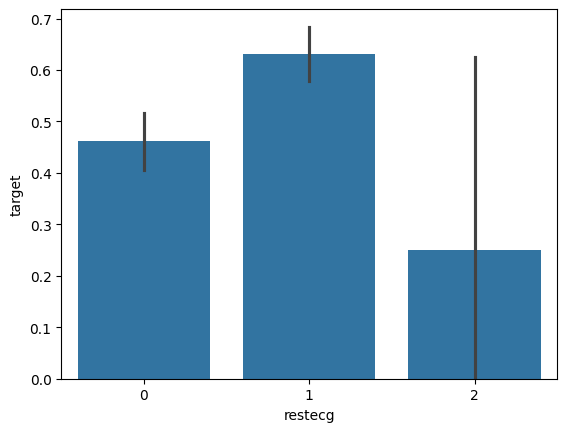

In [25]:
sns.barplot(x=dataset["restecg"],y=y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

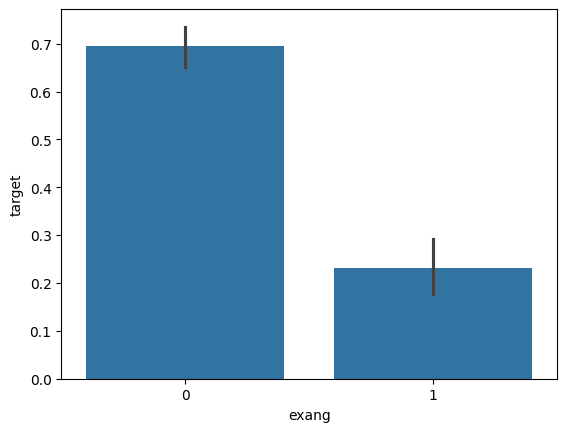

In [27]:
sns.barplot(x=dataset["exang"],y=y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

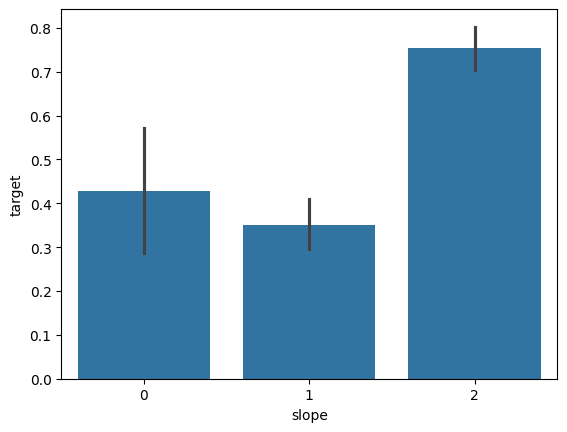

In [29]:
sns.barplot(x=dataset["slope"],y=y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: ylabel='count'>

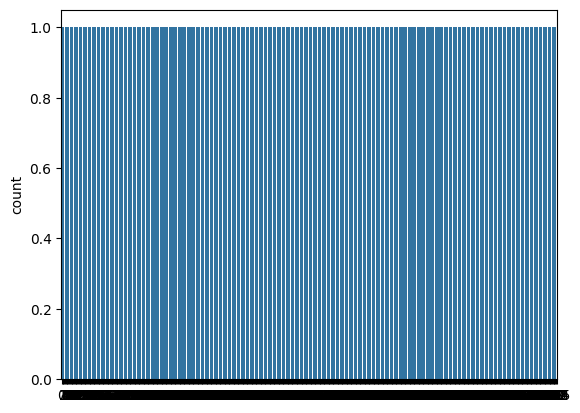

In [32]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

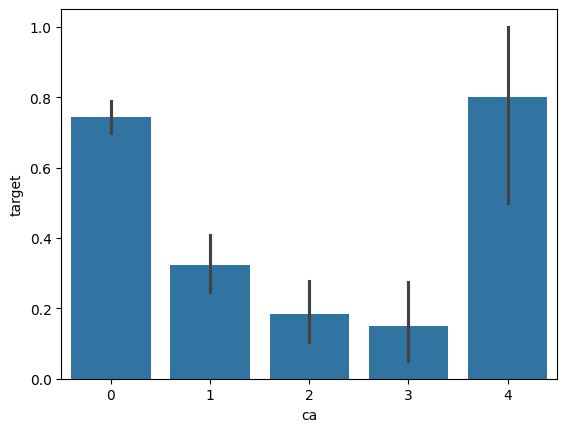

In [33]:
sns.barplot(x=dataset["ca"],y=y)

##### ca=4 has astonishingly large number of heart patients

In [34]:
### Analysing the 'thal' feature

In [35]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

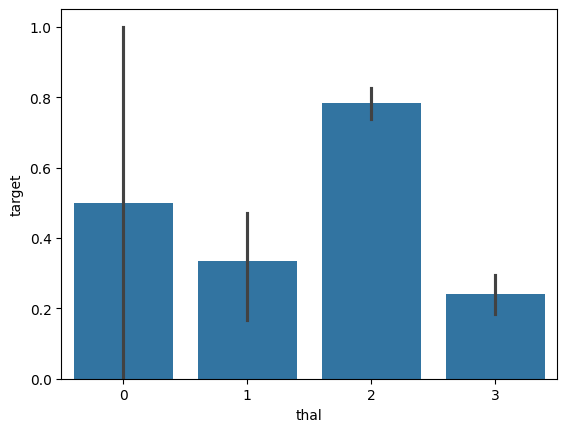

In [36]:
sns.barplot(x=dataset["thal"],y=y)

<Axes: xlabel='thal', ylabel='Density'>

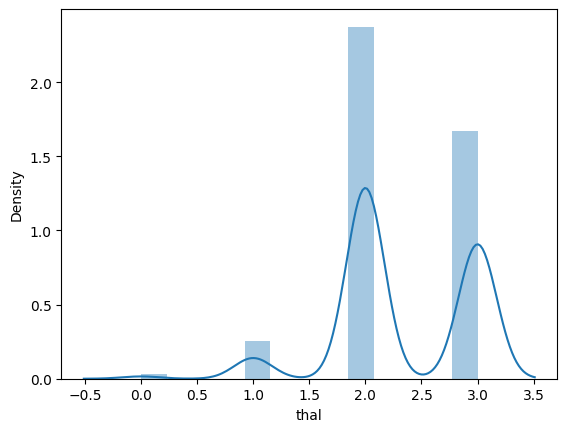

In [37]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [38]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [39]:
X_train.shape

(484, 13)

In [40]:
X_test.shape

(122, 13)

In [41]:
Y_train.shape

(484,)

In [42]:
Y_test.shape

(122,)

## V. Model Fitting

In [43]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [45]:
Y_pred_lr.shape

(122,)

In [46]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %


### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [48]:
Y_pred_nb.shape

(122,)

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.07 %


### SVM

In [50]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [51]:
Y_pred_svm.shape

(122,)

In [52]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.89 %


### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [54]:
Y_pred_knn.shape

(122,)

In [55]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 69.67 %


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [57]:
print(Y_pred_dt.shape)

(122,)


In [58]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 91.8 %


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

max_accuracy = 0

# Hyperparameter tuning for random_state
for x in range(2000):
    rf = RandomForestClassifier(random_state=x,n_estimators=50) 
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train the best model with the best random_state
rf = RandomForestClassifier(random_state=best_x,n_estimators=50)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)

# Save the best model to a file
joblib.dump(rf, 'random_forest_model.pkl')  # Save the model

print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")


The accuracy score achieved using Random Forest is: 96.72 %


### XGBoost

In [60]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [61]:
Y_pred_xgb.shape

(122,)

In [62]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 92.62 %


### Neural Network

In [63]:
from keras.models import Sequential
from keras.layers import Dense

In [64]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4713 - loss: 26.4040 
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 16.3980 
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3920 - loss: 10.9099 
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4008 - loss: 8.7314 
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3749 - loss: 8.4233
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4076 - loss: 7.9847
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3935 - loss: 7.6778
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4044 - loss: 7.5728
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4009 - loss: 6.9388
Epoch 10/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3538 - loss: 6.9982 
Epoch 11/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3944 - loss: 6.6487
Epoch 12/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

In [66]:
Y_pred_nn = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [67]:
Y_pred_nn.shape

(122, 1)

In [68]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [69]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 87.7 %


## VI. Output final score

In [70]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %
The accuracy score achieved using Naive Bayes is: 86.07 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using K-Nearest Neighbors is: 69.67 %
The accuracy score achieved using Decision Tree is: 91.8 %
The accuracy score achieved using Random Forest is: 96.72 %
The accuracy score achieved using XGBoost is: 92.62 %
The accuracy score achieved using Neural Network is: 87.7 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

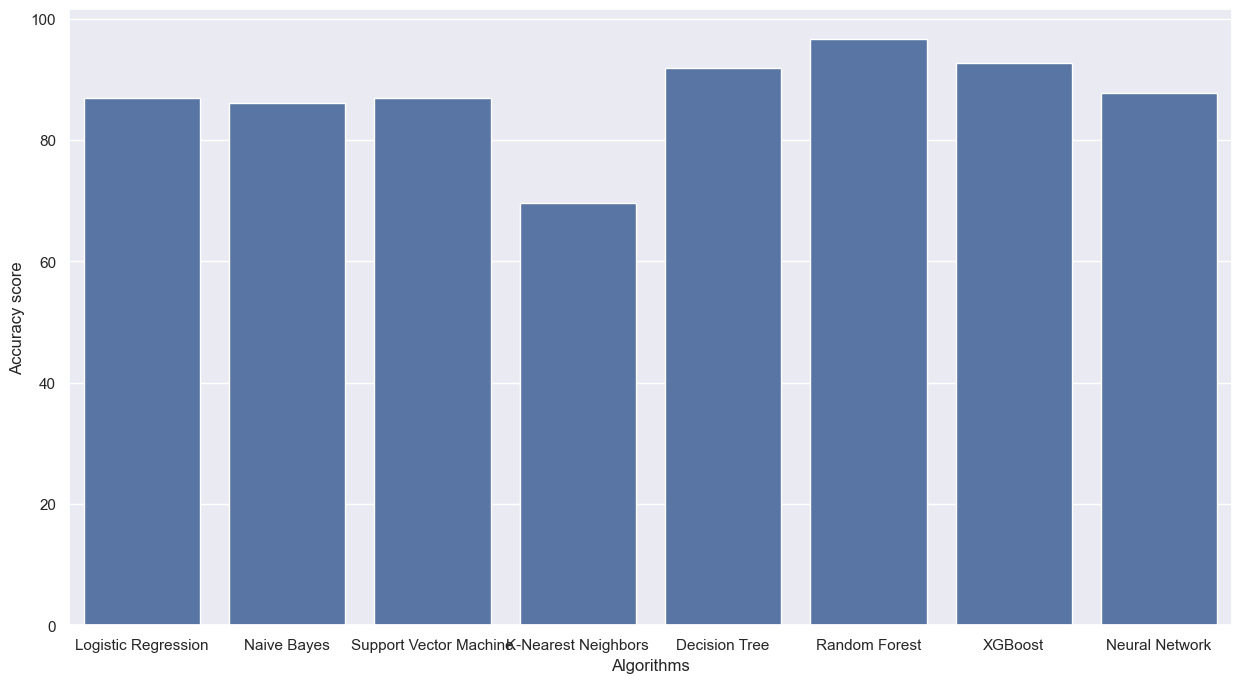

In [71]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores) 

### Hey chandu there random forest has good result as compare to other algorithms <br> <br>